In [1]:
import os
from selenium import webdriver

#set access in macos
#xattr -d com.apple.quarantine chromedriver
# browser = webdriver.Chrome(executable_path = "./chromedriver")
# browser.get('https://www.google.com/')

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from time import sleep
from collections import Counter

import threading
import time
import pandas as pd
import numpy as np
from numpy import nan
import re
import concurrent.futures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [8]:
a = pd.read_csv('')

sdafasdfb
sdafasdfbasdf123
sdafasdfbasdf123
sdafasdfbasdf123
sdafasdfbasdf123


### Initialize Selenium

In [3]:
# create object for chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
browser = webdriver.Chrome('./chromedriver', options = chrome_options)
browser.implicitly_wait(5)

/var/folders/y8/snwjrj_d75v27837y00p3vk80000gn/T/ipykernel_34674/2506676827.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('./chromedriver', options = chrome_options)


### Remove Language Option Overlay

In [4]:
SHOPEE_URL = 'https://shopee.vn/'
browser.get(SHOPEE_URL)

popup = browser.find_elements(By.CLASS_NAME, 'home-popup')
for e in popup:
  if e.get_attribute('class') == 'shopee-popup__close-btn':
    e.click()
    break

elements = browser.find_elements(By.CLASS_NAME, 'shopee-button-outline--primary-reverse')

for e in elements:
  if e.text == 'English':
    e.click()
    break

In [5]:
keywords = [
            'MSI Laptop',
            'Dell Laptop',
            'Asus Laptop',
            'LG Laptop'
]
# Arfan
name, price, favourite = [], [], []
# Fakhrul
processor, weight = [], []
# Danish Irfan
rating, model = [], []
# Danish KA
noOfSold, brand, stock = [], [], []

## Extract

### Link Extraction

In [6]:
links = []

def load_links(base_url):
  for keyword in keywords:
    try:
      browser.get(base_url + keyword)
      WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.shopee-search-item-result__items'))) # Wait until `shop result` loaded within 10 secs or timeout

      # change second parameter in range function in scale of 1 - 5.
      # 1 = 20% (~15 links)
      # 2 = 40% (~25 links)
      # 3 = 60% (~40 links)
      # 4 = 80% (~55 links)
      # 5 = 100% (~60 links)
      for i in range(1, 1):
        browser.execute_script(f"window.scrollTo(document.body.scrollWidth * 0.3, document.body.scrollHeight * {i/5});")
        # WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div._3GAFiR')))
        WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.shopee-search-item-result__items'))) # Wait until `shop result` loaded within 10 secs or timeout

      soup = BeautifulSoup(browser.page_source, "html.parser")
      key_links = soup.find_all(href=True, attrs={'data-sqe': 'link'})
      for a in key_links:
        links.append(a['href'].encode("ascii", "ignore").decode())

      print(f'Found {len(key_links)} link(s) in {keyword}')
    except TimeoutException:
      print("Timeout")
    except Exception as e:
      print(f"ERROR: {e}")

load_links(SHOPEE_URL + 'search?keyword=')
load_links(SHOPEE_URL + 'mall/search?keyword=')
print(f'Total of {len(links)} links found.')

Found 15 link(s) in MSI Laptop
Found 15 link(s) in Dell Laptop
Found 15 link(s) in Asus Laptop
Found 15 link(s) in LG Laptop
Found 15 link(s) in MSI Laptop
Found 15 link(s) in Dell Laptop
Found 15 link(s) in Asus Laptop
Found 15 link(s) in LG Laptop
Total of 120 links found.


## Extract Data From URL

### Initialize Selenium Driver Function

In [7]:
threadLocal = threading.local()

def get_driver(create_new = False):
  driver = getattr(threadLocal, 'driver', None)

  if driver is None or create_new:
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    ser = Service("./chromedriver")
    driver = webdriver.Chrome(service=ser, options = chrome_options)
    # driver = webdriver.Chrome('./chromedriver', options = chrome_options)
    setattr(threadLocal, 'driver', driver)
    
  return driver

In [9]:
SHOPEE_URL + links[1]

'https://shopee.vn//Surface-Laptop-Go-Core-i5-1035G1-VGA-Intel-UHD-G1-Mn-12.4-inch-1.5K-cm-ng-IPS-my-mi-100--i.830643840.22712813582?sp_atk=32ee099f-09d2-4cb7-b458-0005a81a6dc1&xptdk=32ee099f-09d2-4cb7-b458-0005a81a6dc1'

In [10]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
ser = Service("./chromedriver")
browser = webdriver.Chrome(service=ser, options = chrome_options)
browser.implicitly_wait(5)
browser.get(SHOPEE_URL + links[1])
WebDriverWait(browser, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.X0xUb5'))) # Wait until `price` loaded within 10 secs or timeout
soup = BeautifulSoup(browser.page_source, "html.parser")
price_value = getattr(soup.select_one('.X0xUb5'), 'text', 'None')
price_value

TimeoutException: Message: 
Stacktrace:
0   chromedriver                        0x0000000100ddfb7c chromedriver + 4209532
1   chromedriver                        0x0000000100d6b418 chromedriver + 3732504
2   chromedriver                        0x0000000100a1e368 chromedriver + 271208
3   chromedriver                        0x0000000100a59fc8 chromedriver + 516040
4   chromedriver                        0x0000000100a91804 chromedriver + 743428
5   chromedriver                        0x0000000100a4c59c chromedriver + 460188
6   chromedriver                        0x0000000100a4d644 chromedriver + 464452
7   chromedriver                        0x0000000100db130c chromedriver + 4018956
8   chromedriver                        0x0000000100db4fd8 chromedriver + 4034520
9   chromedriver                        0x0000000100dbb11c chromedriver + 4059420
10  chromedriver                        0x0000000100db5bac chromedriver + 4037548
11  chromedriver                        0x0000000100d8fbb0 chromedriver + 3881904
12  chromedriver                        0x0000000100dd2120 chromedriver + 4153632
13  chromedriver                        0x0000000100dd2274 chromedriver + 4153972
14  chromedriver                        0x0000000100de682c chromedriver + 4237356
15  libsystem_pthread.dylib             0x000000019dae106c _pthread_start + 148
16  libsystem_pthread.dylib             0x000000019dadbe2c thread_start + 8


### Fetching Data

In [11]:
def fetch_data(url):
    try:
      print(f'[{threading.current_thread().name}] Fetching data from {url}...')

      driver = get_driver()
      driver.get(SHOPEE_URL + url[1:])
      WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.X0xUb5'))) # Wait until `price` loaded within 10 secs or timeout

      soup = BeautifulSoup(driver.page_source, "html.parser")

      ## ONLY Change below
      price_value = getattr(soup.select_one('.X0xUb5'), 'text', 'None')
      name_value = getattr(soup.select_one('.YPqix5 > span'), 'text', 'None')
      rating_value = getattr(soup.select('.gS2iLG > .yz-vZm')[0], 'text', 'None')
      favourite_value = getattr(soup.select('.gS2iLG > .yz-vZm')[1], 'text', 'None')
      sold_value = getattr(soup.select_one('div.yiMptB'), 'text', 'None')
      cpu_value = 'None'
      weight_value = 'None'
      brand_value = 'None'
      stock_value = 'None'
      model_value = 'None'

      specs = soup.select('.VYmrqq')
      for col in specs:
        key = col.select_one('label.zgeHL-').text
        value = getattr(col.select_one('div'), 'text', 'None')

        # if key == 'Processor Type' and value != 'None':
        #   cpu_value = value
          
        # if 'Weight' in key and value != 'None':
        #   weight_value = value

        # if 'Model' in key and value != 'None':
        #   model_value = value

        if 'Brand' in key and col.select_one('a') != None:
          brand_value = col.select_one('a').text
        
        if 'Thương hiệu' in key and col.select_one('a') != None:
          brand_value = col.select_one('a').text

        if 'Stock' in key and value != 'None':
          stock_value = value

        if 'Kho hàng' in key and value != 'None':
          stock_value = value

      price.append(price_value)
      name.append(name_value)
      favourite.append(favourite_value)
      # processor.append(cpu_value)
      # weight.append(weight_value)
      brand.append(brand_value)
      noOfSold.append(sold_value)
      stock.append(stock_value)
      # model.append(model_value)
      rating.append(rating_value)

    except TimeoutException:
      print('TIMEOUT')
      driver = get_driver(True)
      sleep(3)
    except Exception as exc:
      print(f'[EXCEPTION]: {url} generated an exception: {exc}')

In [20]:
start_time = time.time()
link_count = len(links)

with concurrent.futures.ThreadPoolExecutor(max_workers = 2) as executor:
  executor.map(fetch_data, links)
  executor.shutdown(wait=False)

# Print Execution Result
print(f"Elapsed run time: {time.time() - start_time} seconds.")
print(f"Fetched {len(name)} out of {link_count} links.")
print(f"Failed to fetch {link_count - len(name)} links due to exception/timeout.")

[ThreadPoolExecutor-1_0] Fetching data from /-My-tnh-DYNABOOK-U63H-Core-i7-2.7GHz(7500U)-8GB-256G-13'3-inch-FHD-IPS-mn-cm-ng-i.476971834.18159270783?sp_atk=6c82e8b2-28da-4830-bdea-5a0e08c4050b&xptdk=6c82e8b2-28da-4830-bdea-5a0e08c4050b...[ThreadPoolExecutor-1_1] Fetching data from /Surface-Laptop-Go-Core-i5-1035G1-VGA-Intel-UHD-G1-Mn-12.4-inch-1.5K-cm-ng-IPS-my-mi-100--i.830643840.22712813582?sp_atk=32ee099f-09d2-4cb7-b458-0005a81a6dc1&xptdk=32ee099f-09d2-4cb7-b458-0005a81a6dc1...

[ThreadPoolExecutor-1_0] Fetching data from /-BUILE100K-gim-100K)-Laptop-c-gi-r-cu-hnh-I3-8GB-256GB-SSD-hc-online-gii-tr-chin-game-OK-a-dng-Model-i.158294751.19267973181?sp_atk=5a43342d-3352-4541-8ce9-abc7c34acc40&xptdk=5a43342d-3352-4541-8ce9-abc7c34acc40...
[EXCEPTION]: /-BUILE100K-gim-100K)-Laptop-c-gi-r-cu-hnh-I3-8GB-256GB-SSD-hc-online-gii-tr-chin-game-OK-a-dng-Model-i.158294751.19267973181?sp_atk=5a43342d-3352-4541-8ce9-abc7c34acc40&xptdk=5a43342d-3352-4541-8ce9-abc7c34acc40 generated an exception: lis

KeyboardInterrupt: 

[EXCEPTION]: /Laptop-MSI-Modern-14-B11MOU-1033VN-i7-1195G7-8GB-512GB-14'-FHD-Win-11-i.59923321.17503549739?sp_atk=a92e7455-0162-411a-8eee-1b10f940f7a8&xptdk=a92e7455-0162-411a-8eee-1b10f940f7a8 generated an exception: HTTPConnectionPool(host='localhost', port=49627): Max retries exceeded with url: /session/904d65b703735170f080b3f0356d85cc/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1469856a0>: Failed to establish a new connection: [Errno 61] Connection refused'))


[ThreadPoolExecutor-1_1] Fetching data from /Laptop-MSI-Modern-14-B5M-202VN-R5-5500U-8GB-512GB-14-FHD-Win-11-i.479152347.21517620481?sp_atk=2bfb0f68-5f9a-4d9f-904c-bb5e23b101d6&xptdk=2bfb0f68-5f9a-4d9f-904c-bb5e23b101d6...
[EXCEPTION]: /-Hng-Mi-100-Laptop-MSI-Modern-14-B5M-064VN-Hng-Chnh-Hng-i.28632600.12857864615?sp_atk=a0f55781-e30a-4915-ad69-b1fae9c9f416&xptdk=a0f55781-e30a-4915-ad69-b1fae9c9f416 generated an exception: HTTPConnectionPool(host='localhost', port=49536): Max retries exceeded with url: /session/9fa7e17fcb44860468f27da725445727/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1479b7f10>: Failed to establish a new connection: [Errno 61] Connection refused'))
[ThreadPoolExecutor-1_0] Fetching data from /-M-ELBAU4-GIM-4-Laptop-MSI-GF63-Thin-11SC-664VN-665VN-i5-11400H-GeForce-GTX-1650-4GB-i.383770348.16046201894?sp_atk=ad7555b1-e8a7-422e-93e1-dda000671c78&xptdk=ad7555b1-e8a7-422e-93e1-dda000671c78...
[EXCEPTION]: /Laptop-MSI-Modern-14-B5M-2

In [22]:
links[1][1:]

'Surface-Laptop-Go-Core-i5-1035G1-VGA-Intel-UHD-G1-Mn-12.4-inch-1.5K-cm-ng-IPS-my-mi-100--i.830643840.22712813582?sp_atk=32ee099f-09d2-4cb7-b458-0005a81a6dc1&xptdk=32ee099f-09d2-4cb7-b458-0005a81a6dc1'

## Transform - PreProcessing

### Verifying Scraped Data

In [13]:
print(f'Product Name: {len(name)} data')
print(f'Product Price: {len(price)} data')
print(f'Product Favourite: {len(favourite)} data')
print(f'Product Processor: {len(processor)} data')
print(f'Product Weight: {len(weight)} data')
print(f'Product Brand: {len(brand)} data')
print(f'Product Sold: {len(noOfSold)} data')
print(f'Product Stock: {len(stock)} data')
print(f'Product Model: {len(model)} data')
print(f'Product Rating: {len(rating)} data')

Product Name: 34 data
Product Price: 34 data
Product Favourite: 34 data
Product Processor: 0 data
Product Weight: 0 data
Product Brand: 34 data
Product Sold: 34 data
Product Stock: 34 data
Product Model: 0 data
Product Rating: 34 data


### Create DataFrame

In [23]:
df = pd.DataFrame({
    'Product Name': name,
    'Price': price,
    'Favourite': favourite,
    'Brand':  brand,
    'Product Sold': noOfSold,
    'Stock': stock,
    'Rating': rating
})

df.head()

,Product Name,Price,Favourite,Brand,Product Sold,Stock,Rating
0,Xả Laptop Toshiba z30 Corei5-6200u / Ram8 /SSD...,₫4.080.000 - ₫7.800.000,89,TOSHIBA,581,89,5.0
1,"Laptop Dell VOS14 3400 i5-1135G7,8GD4,512SSD,1...",₫14.985.000,28,Dell,84,1,5.0
2,Laptop MSI Modern 14 B5M 202VN/R5 5500U/8GB/51...,₫14.290.000,1,MSI,2,3,5.0
3,[Máy tính] DYNABOOK U63H Core i7-2.7GHz(7500U...,₫6.500.000 - ₫7.700.000,86,TOSHIBA,581,88,5.0
4,[MÃ ELBAU4 GIẢM 4%] Laptop MSI GF63 Thin 11SC-...,₫17.490.000,3,MSI,7,39,5.0


In [25]:
df.to_csv('data/data_raw.csv', sep='\t', encoding='utf-8')

In [14]:
df.replace({'None': np.nan, '': np.nan}, inplace=True)
dfOri = df.copy()

df.head(5)

,Product Name,Price,Favourite,Brand,Product Sold,Stock,Rating
0,Xả Laptop Toshiba z30 Corei5-6200u / Ram8 /SSD...,₫4.080.000 - ₫7.800.000,89,TOSHIBA,580,88,5.0
1,[Mã ELBAU4 Giảm 4% ] Laptop MSI GF63 Thin 11UD...,₫18.490.000,2,MSI,6,17,5.0
2,Laptop MSI Modern 14 B5M 202VN/R5 5500U/8GB/51...,₫14.290.000,1,MSI,2,3,5.0
3,[Mã ELMALL61 giảm 6% đơn 300K] Laptop Dell VOS...,NaN,27,Dell,80,11,5.0
4,Dell latitude E7280 i5 & i7 dòng máy doanh nhâ...,₫5.500.000 - ₫7.500.000,7,Dell,14,23,5.0


### Data Wrangling

### Detecting Missing Values

In [15]:
df.isnull().sum()

Product Name    0
Price           3
Favourite       0
Brand           4
Product Sold    0
Stock           2
Rating          0
dtype: int64

### Data Cleaning

In [16]:
df['Rating'] = df['Rating'].astype(float)

meanRating = df['Rating'].mean()
meanRating = "{:.1f}".format(meanRating)

df['Rating'].replace(np.nan, meanRating, inplace=True)
df.head()

,Product Name,Price,Favourite,Brand,Product Sold,Stock,Rating
0,Xả Laptop Toshiba z30 Corei5-6200u / Ram8 /SSD...,₫4.080.000 - ₫7.800.000,89,TOSHIBA,580,88,5.0
1,[Mã ELBAU4 Giảm 4% ] Laptop MSI GF63 Thin 11UD...,₫18.490.000,2,MSI,6,17,5.0
2,Laptop MSI Modern 14 B5M 202VN/R5 5500U/8GB/51...,₫14.290.000,1,MSI,2,3,5.0
3,[Mã ELMALL61 giảm 6% đơn 300K] Laptop Dell VOS...,NaN,27,Dell,80,11,5.0
4,Dell latitude E7280 i5 & i7 dòng máy doanh nhâ...,₫5.500.000 - ₫7.500.000,7,Dell,14,23,5.0


In [17]:
def lookupBrand(name):
  return next((x for x in brands if str(x).lower().strip() in name.lower()), np.nan)

In [18]:
brands = df['Brand'].unique()
brands

array(['TOSHIBA', 'MSI', 'Dell', nan, 'Asus', 'LG'], dtype=object)

In [19]:
df['Brand'] = df.apply(lambda x: x['Brand'] if not pd.isnull(x['Brand']) else lookupBrand(x['Product Name']), axis=1)
df.head()

,Product Name,Price,Favourite,Brand,Product Sold,Stock,Rating
0,Xả Laptop Toshiba z30 Corei5-6200u / Ram8 /SSD...,₫4.080.000 - ₫7.800.000,89,TOSHIBA,580,88,5.0
1,[Mã ELBAU4 Giảm 4% ] Laptop MSI GF63 Thin 11UD...,₫18.490.000,2,MSI,6,17,5.0
2,Laptop MSI Modern 14 B5M 202VN/R5 5500U/8GB/51...,₫14.290.000,1,MSI,2,3,5.0
3,[Mã ELMALL61 giảm 6% đơn 300K] Laptop Dell VOS...,NaN,27,Dell,80,11,5.0
4,Dell latitude E7280 i5 & i7 dòng máy doanh nhâ...,₫5.500.000 - ₫7.500.000,7,Dell,14,23,5.0


In [20]:
df.dropna(subset=["Brand"], axis=0, inplace = True)

In [23]:
# simply drop whole row with NaN in "Price" column
df.dropna(subset=["Price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

# simply drop whole row with NaN in "Price" column
df.dropna(subset=["Stock"], axis=0, inplace = True)

In [24]:
df.isnull().sum()

Product Name    0
Price           0
Favourite       0
Brand           0
Product Sold    0
Stock           0
Rating          0
dtype: int64

### Data Processing

#### Product Name - Remove Unknown Character 


In [25]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [27]:
df['Product Name'] = df['Product Name'].apply(lambda x: deEmojify(x))
#df['Product Name'] = df['Product Name'].str.replace(r'[^\x00-\x7F]+', '')

In [96]:
# Price
def average(lst):
  return round(sum(lst) / len(lst), 2)

df['Price'] = df['Price'].str.replace('₫', '').str.replace('.', '').str.split('-').apply(lambda row: average([float(x.strip(' ')) for x in row]) if type(row) is not float else np.nan)
# x = df['Price'].iloc[0:5].str.replace('₫', '').str.replace('.', '').str.split('-')
# x.apply(lambda row: average([float(re.findall(r'\d+\.\d+', x.strip(' '))[0]) for x in row]) if type(row) is not float else np.nan)

/var/folders/y8/snwjrj_d75v27837y00p3vk80000gn/T/ipykernel_28618/3932939557.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('₫', '').str.replace('.', '').str.split('-').apply(lambda row: average([float(x.strip(' ')) for x in row]) if type(row) is not float else np.nan)


In [98]:
avg_1 = df["Price"].astype("float").mean(axis = 0)

df["Price"].fillna((df["Price"].mean()),inplace = True)
df["Price"] = df["Price"].astype("float").round(2)

In [99]:
df["Product Sold"] = df['Product Sold'].str.extract(r'(\d+[.\d]*k*)')
df["Product Sold"] = df['Product Sold'].replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(int)
df['Product Sold'].fillna((df['Product Sold'].mean()), inplace=True)

In [100]:
df["Favourite"] = df['Favourite'].str.extract(r'(\d+[.\d]*k*)')
df['Favourite'].replace(np.nan, 0, inplace=True)
df["Favourite"] = df['Favourite'].replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(int)

df['Favourite'].replace(0, df['Favourite'].mean(), inplace=True)
df["Favourite"] = df["Favourite"].astype(int)

In [101]:
df.dtypes

Product Name     object
Price           float64
Favourite         int64
Brand            object
Product Sold      int64
Stock            object
Rating          float64
dtype: object

In [102]:
df["Product Name"] = df["Product Name"].astype('string')
df["Brand"] = df["Brand"].astype('string')
df["Product Sold"] = df["Product Sold"].astype(int)
df["Stock"] = df["Stock"].astype(int)
df["Rating"] = df["Rating"].astype(float).round(1)

In [103]:
df.dtypes

Product Name     string
Price           float64
Favourite         int64
Brand            string
Product Sold      int64
Stock             int64
Rating          float64
dtype: object

## Visualization

In [113]:
filteredDf = df[(df['Price'] > 5000000)]

### Price

In [114]:
filteredDf['Price'].describe()

count    4.200000e+01
mean     1.375024e+07
std      5.404307e+06
min      5.800000e+06
25%      9.187500e+06
50%      1.439000e+07
75%      1.824000e+07
max      2.599000e+07
Name: Price, dtype: float64

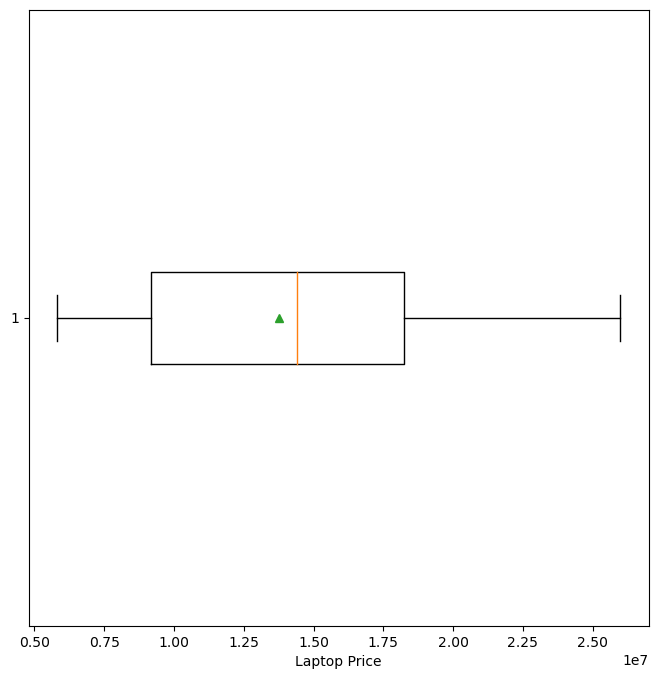

In [115]:
plt.figure(figsize=(8,8))
plt.xlabel('Laptop Price')
plt.boxplot(filteredDf["Price"], showmeans=True, vert=False)
plt.show()

### Favourite & Rating

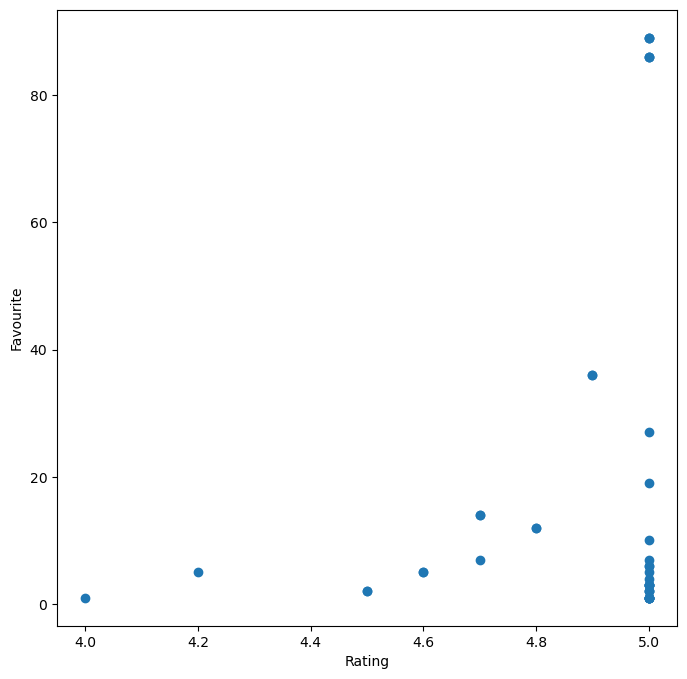

In [116]:
plt.figure(figsize=(8,8))
plt.scatter(filteredDf['Rating'],filteredDf['Favourite'])
plt.xlabel('Rating')
plt.ylabel('Favourite')
plt.show()

In [117]:
filteredDf[["Rating", "Favourite"]].corr()

,Rating,Favourite
Rating,1.000000,0.220469
Favourite,0.220469,1.000000


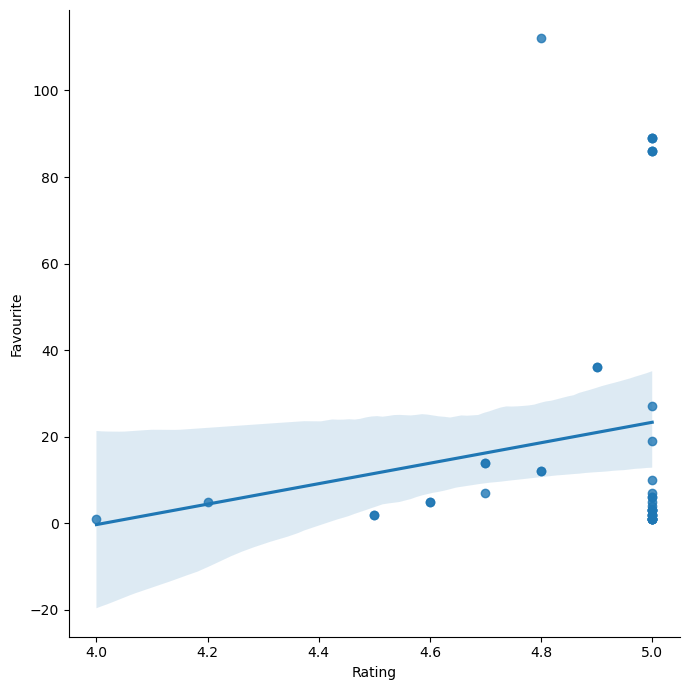

In [118]:
sns.lmplot(x='Rating', y='Favourite', data=df, fit_reg=True, height=7)
plt.show()

### Brand

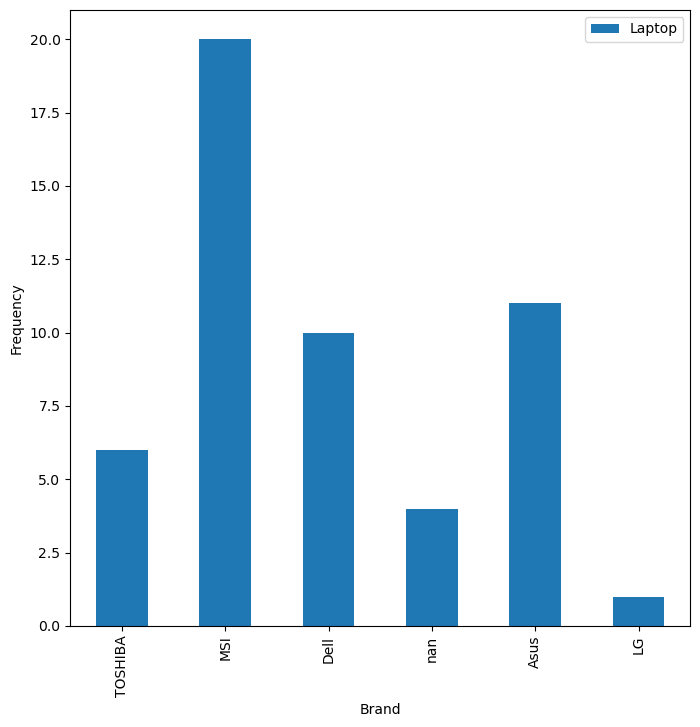

In [121]:
letter_counts = Counter(dfOri['Brand'])
dfPlot = pd.DataFrame.from_dict(letter_counts, orient='index')
dfPlot.plot(kind='bar', figsize=(8,8))
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.legend(['Laptop'])
plt.show(block=True)

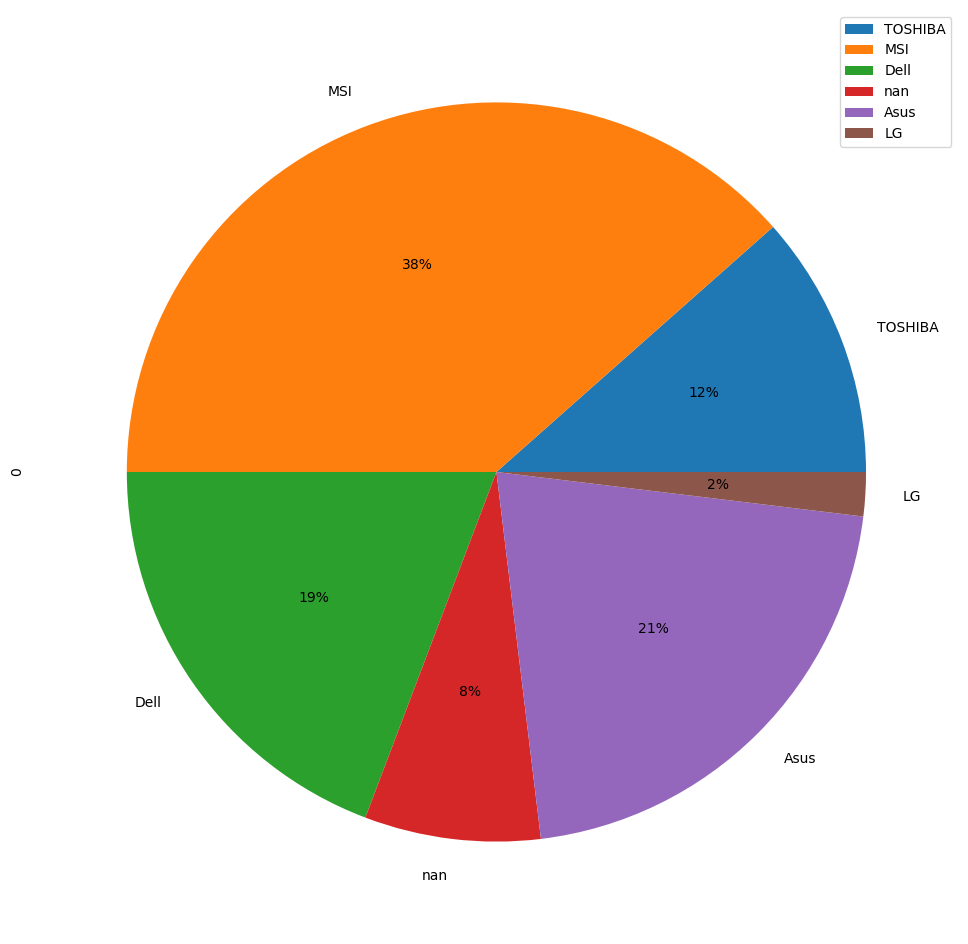

In [122]:
letter_counts = Counter(dfOri['Brand'])
dfPlot = pd.DataFrame.from_dict(letter_counts, orient='index')
dfPlot.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(12,12))
plt.show()

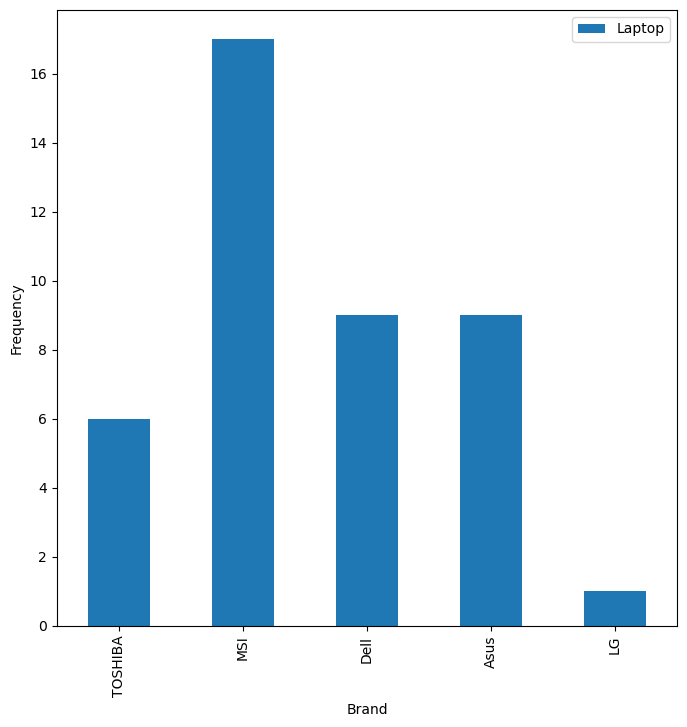

In [123]:
letter_counts = Counter(filteredDf['Brand'])
dfPlot = pd.DataFrame.from_dict(letter_counts, orient='index')
dfPlot.plot(kind='bar', figsize=(8,8))
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.legend(['Laptop'])
plt.show(block=True)

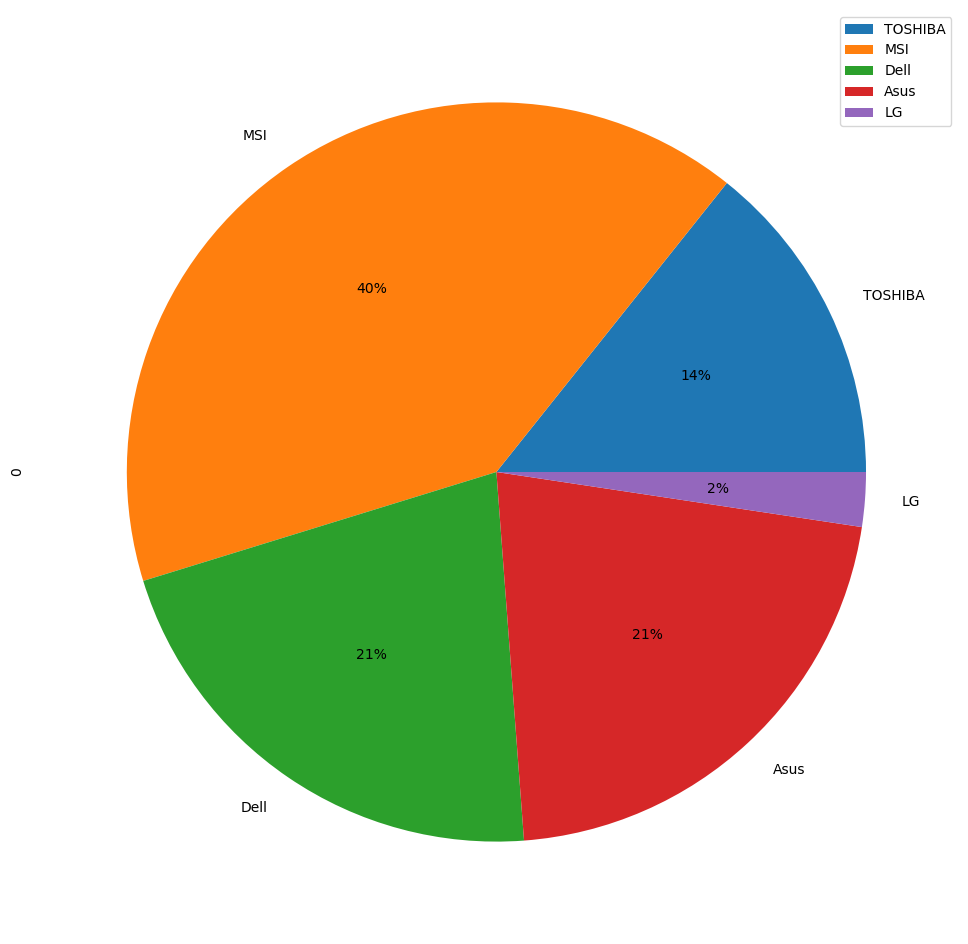

In [124]:
letter_counts = Counter(filteredDf['Brand'])
dfPlot = pd.DataFrame.from_dict(letter_counts, orient='index')
dfPlot.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(12,12))
plt.show()

### Stock & Product Sold

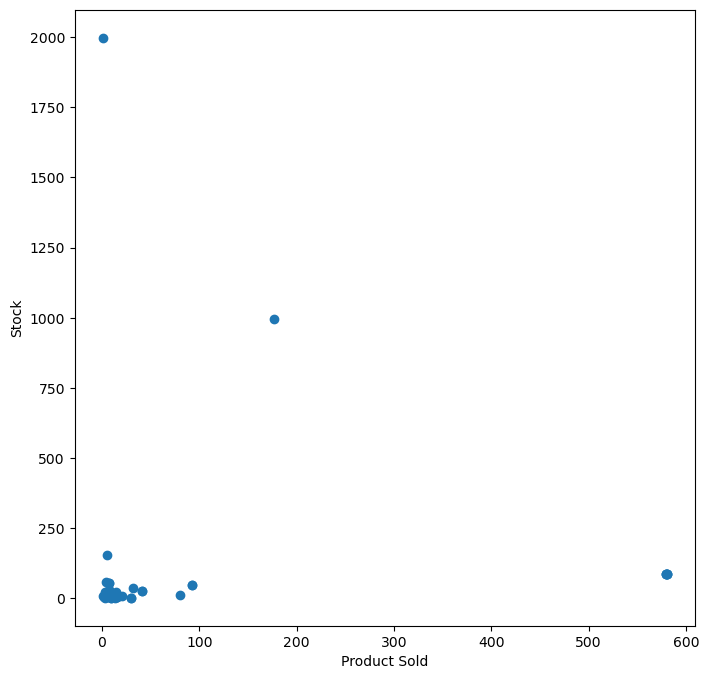

In [125]:
plt.figure(figsize=(8,8))
plt.scatter(filteredDf['Product Sold'], filteredDf['Stock'])
plt.xlabel('Product Sold')
plt.ylabel('Stock')
plt.show()

In [126]:
filteredDf[["Product Sold", "Stock"]].corr()

,Product Sold,Stock
Product Sold,1.000000,0.022207
Stock,0.022207,1.000000


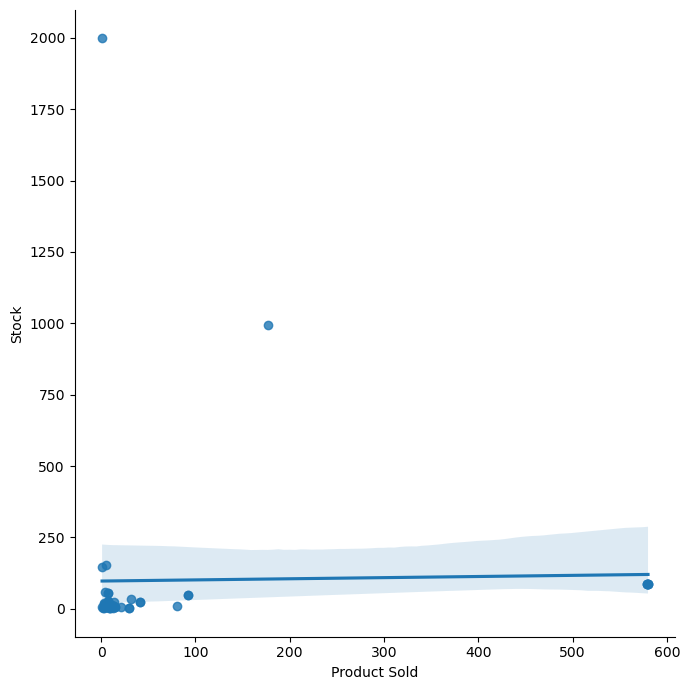

In [127]:
sns.lmplot(x='Product Sold', y='Stock', data=df, fit_reg=True, height=7)
plt.show()